<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project2 - Bike Sharing</h3>
</div>

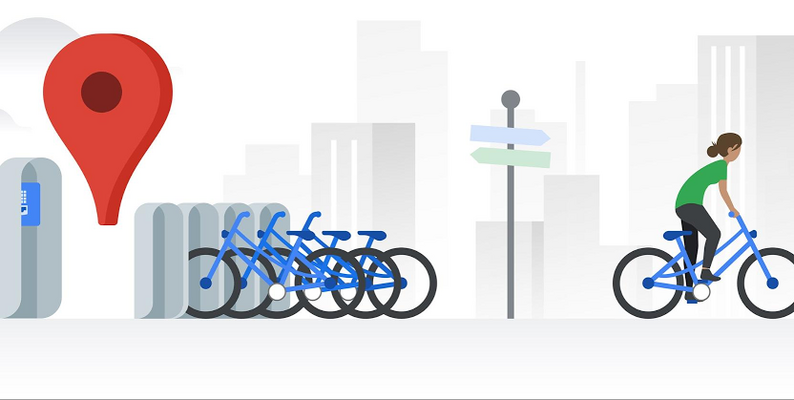

## Importing the libraries

In [419]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Load and Prepare Data

In [420]:
df = pd.read_csv('./train.csv')

In [421]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [423]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [424]:
df.drop(['datetime'], axis=1, inplace=True)

## EDA

<Axes: >

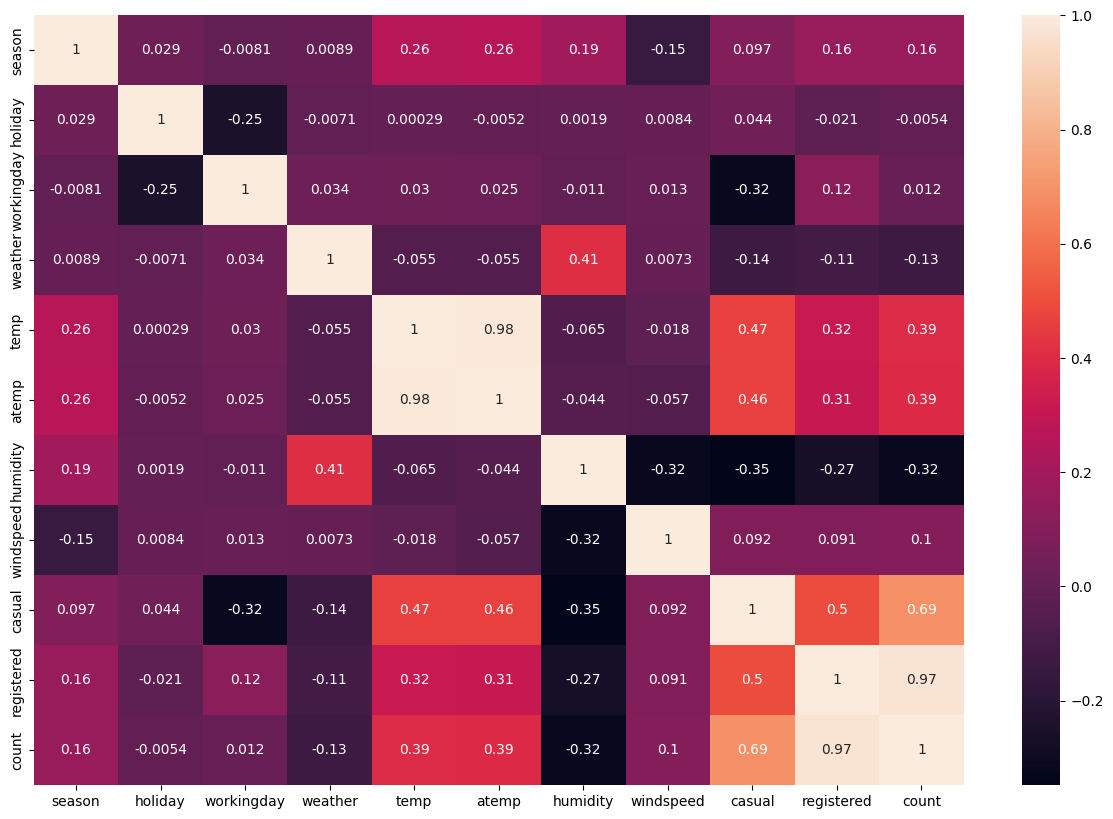

In [425]:
plt.figure(figsize = (15, 10))
corr = df.corr()
sns.heatmap(corr, annot=True)

In [426]:
df.drop(['atemp', 'casual', 'registered'], axis=1, inplace=True)

In [427]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   humidity    10886 non-null  int64  
 6   windspeed   10886 non-null  float64
 7   count       10886 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 680.5 KB


## Data Preprocessing

In [428]:
df.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
humidity      0
windspeed     0
count         0
dtype: int64

## Strorytelling - Visualization

<Axes: ylabel='temp'>

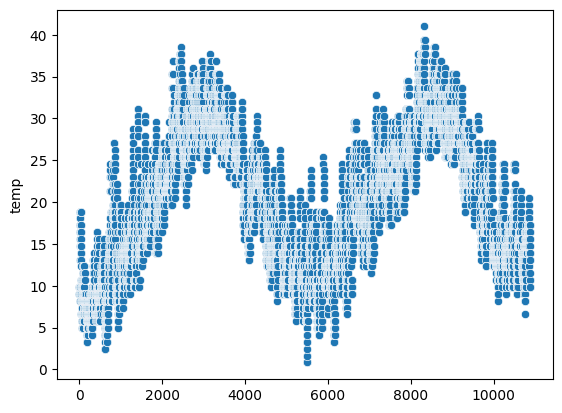

In [429]:
sns.scatterplot(df['temp'])

<Axes: ylabel='windspeed'>

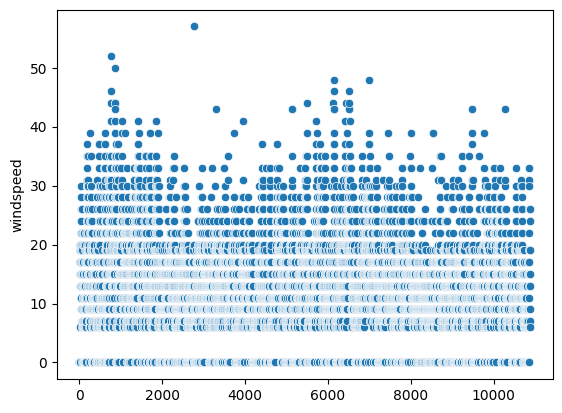

In [430]:
sns.scatterplot(df['windspeed'])

In [431]:
# df.groupby('season').count()

## Train your model (Regression)

In [432]:
season = pd.get_dummies(df['season'])
df = pd.concat([df,season],axis=1)
df.rename(columns={1:'spring', 2:'summer', 3:'fall', 4:'winter'}, inplace=True)
df.drop(['season', 'spring'], axis=1, inplace=True)

In [433]:
weather = pd.get_dummies(df['weather'])
df = pd.concat([df, weather],axis=1)
df.rename(columns={1:'weather-1', 2:'weather-2', 3:'weather-3', 4:'weather-4'}, inplace=True)
df.drop(['weather', 'weather-1'], axis=1, inplace=True)

In [434]:
df.sample(5)

,holiday,workingday,temp,humidity,windspeed,count,summer,fall,winter,weather-2,weather-3,weather-4
1945,0,0,20.50,59,7.0015,119,True,False,False,False,False,False
8127,0,1,24.60,78,11.0014,35,True,False,False,True,False,False
4759,1,0,13.12,45,30.0026,201,False,False,True,False,False,False
1395,0,1,16.40,50,15.0013,6,True,False,False,False,False,False
2806,0,1,31.16,66,7.0015,284,False,True,False,False,False,False


In [435]:
X = df.drop('count', axis=1)
y = df['count']

In [436]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [437]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [438]:
y_pred = regressor.predict(X_test)

## Test Result

<Axes: xlabel='count', ylabel='Count'>

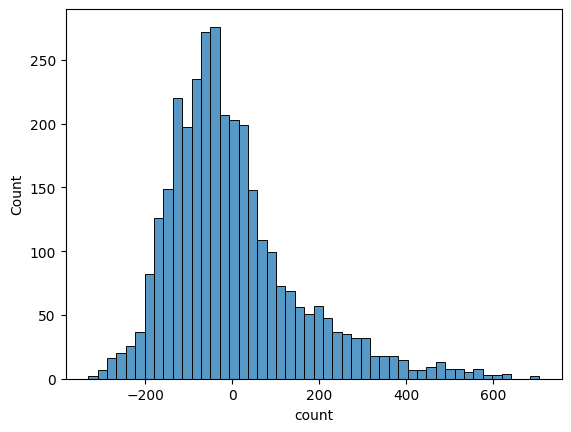

In [439]:
sns.histplot(y_test - y_pred)

<Axes: ylabel='count'>

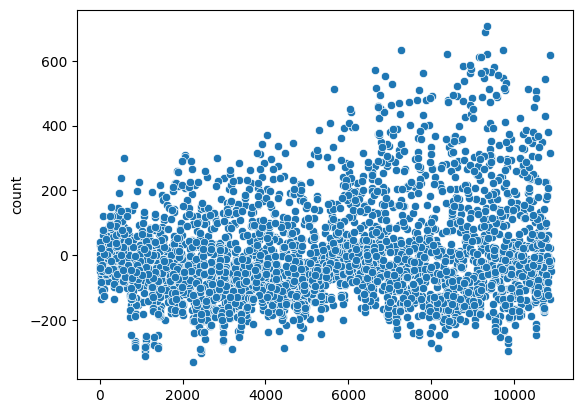

In [440]:
sns.scatterplot(y_test - y_pred)

In [441]:
print('MAE (Mean Absolute Error):', metrics.mean_absolute_error(y_test, y_pred))
print('MSE (Mean Squared Error):', metrics.mean_squared_error(y_test, y_pred))
print('RMSE (Root Mean Squared Error):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE (Mean Absolute Error): 113.68057011636019
MSE (Mean Squared Error): 23241.447015002945
RMSE (Root Mean Squared Error): 152.45145789726953


In [442]:
regressor.coef_

array([ -7.26941598,  -1.86495958,  10.85786484,  -2.83288679,
         0.5148807 ,   4.18241932, -32.58587186,  69.76398452,
        15.879889  ,  -3.85757056, 189.66200769])

In [443]:
regressor.intercept_

np.float64(127.7057924278672)